In [1]:
# Problem Set One - Data Science Math

In [2]:
# Question one - load MNIST and show a montage of the images

In [3]:
# Import the needed packages
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from skimage.util import montage
from skimage.io import imread

In [4]:
# Functions that create a tensor on the GPU from the provided data
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))
def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [5]:
# Defining functions to plot the montage of images from the MNIST dataset
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.show()
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [6]:
# Downloading the MNIST dataset and splitting it into a training set and a testing set
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

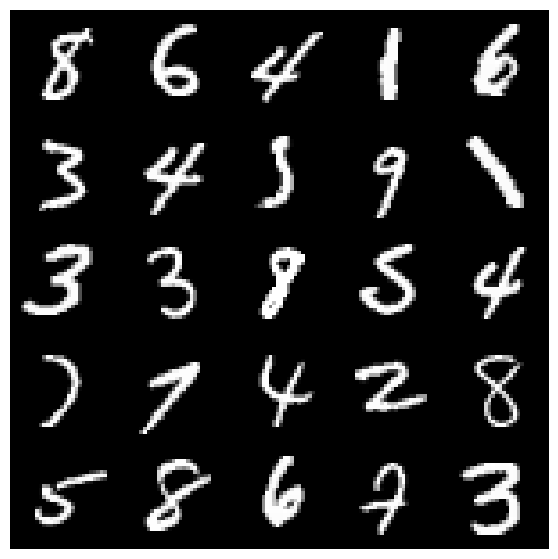

In [7]:
# Changing the training and test datasets to numpy arrays
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
# Normalizing the values in the arrays and showing the montage plot of images
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
montage_plot(X[125:150,0,:,:])

In [8]:
# Question two - Run random y=mx model on MNIST
#Reshape image data tensor from (60000, 1, 28, 28) to (60000, 784)
X = X.reshape(X.shape[0],784)
#Reshape image test data tensor from (60000, 1, 28, 28) to (60000, 784)
X_test = X_test.reshape(X_test.shape[0],784)

In [9]:
# Transferring the datasets to the GPU for faster computation
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [10]:
#Question 3 - Train random walk model to at least 75% accuracy

# Transposing the x data
X = X.T
# Take the first column of 'X' and store it in 'x'
x = X[:,0:1]
# Create a random matrix 'M' (10 rows, 784 columns) and use GPU for calculations
M = GPU(np.random.rand(10,784))
y = M@x
batch_size = 64
# Take the first 'batch_size' columns from 'X' and store them in 'x'
x = X[:,0:batch_size]
# Create another random matrix 'M' (10 rows, 784 columns) and use GPU
M = GPU(np.random.rand(10,784))
# Multiply 'M' with 'x' to get 'y'
y = M@x
# Find the index with the highest value along axis 0 in 'y'
y = torch.argmax(y,0)
# Calculate accuracy by comparing 'y' with the first 'batch_size' elements of 'Y'
torch.sum((y == Y[0:batch_size]))/batch_size

tensor(0.0625, device='cuda:0')

In [11]:
# Initialize variables for the best matrix 'm_best' and its accuracy 'acc_best'
m_best = 0
acc_best = 0



# Perform an optimization loop for a set number of iterations (100,000 times)
for i in range(100000):
    # Set the step size for random updates
    step = 0.0000000001
    # Create a random matrix 'm_random' and move it to the GPU
    m_random = GPU_data(np.random.randn(10,784))
    # Update the matrix 'm' with a small random change
    m = m_best  + step*m_random
    # Calculate predictions 'y' by multiplying 'm' with the dataset 'X'
    y = m@X
    # Find the index with the highest value along axis 0 in 'y'
    y = torch.argmax(y, axis=0)
    # Calculate accuracy by comparing 'y' with the true labels 'Y'
    acc = ((y == Y)).sum()/len(Y)

# If the new accuracy is better than the previous best, update 'm_best' and 'acc_best'.
    if acc > acc_best:
        print(acc.item())
        m_best = m
        acc_best = acc

0.13966666162014008
0.14685000479221344
0.18344999849796295
0.18925000727176666
0.1998833417892456
0.20446667075157166
0.20971666276454926
0.2139500081539154
0.22210000455379486
0.23581667244434357
0.23775000870227814
0.2495666742324829
0.2554500102996826
0.2641833424568176
0.29473334550857544
0.3015666604042053
0.31111666560173035
0.31958332657814026
0.3319833278656006
0.33613333106040955
0.33791667222976685
0.3399166762828827
0.3400833308696747
0.35499998927116394
0.35663333535194397
0.35864999890327454
0.35866665840148926
0.36336666345596313
0.3637833297252655
0.36399999260902405
0.3662833273410797
0.3721666634082794
0.37995001673698425
0.3804500102996826
0.38316667079925537
0.3859333395957947
0.3862999975681305
0.38769999146461487
0.3910500109195709
0.39305001497268677
0.3934166729450226
0.39648333191871643
0.40158334374427795
0.4020833373069763
0.40209999680519104
0.4104500114917755
0.41191667318344116
0.4176666736602783
0.4199833273887634
0.42463332414627075
0.4247500002384186
0.